<a href="https://colab.research.google.com/github/EmanoneL/data_analysis_pet_project/blob/main/association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx
import numpy as np

Набор данных, используемый в этих моделях, содержит купленные клиентами товары. Каждая строка соответствует товару, купленному одним клиентом в одном счете. Нам нужно найти, какие товары следует добавить в сделку «купи один получи один». Выборка из 120 значений.

### Загрузка данных

In [2]:
#Загрузка данных
all_data = pd.read_csv('/content/Market_Basket_Optimisation.csv')
all_data.head(20)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,eggs,pet food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

Количество чеков: 7500<br>
Количество уникальных товаров: 120


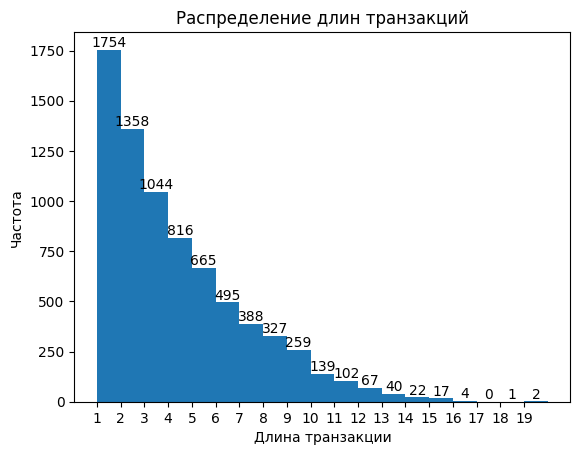

In [4]:
#Анализ транзакций
transaction_lengths = all_data.notnull().sum(axis=1)
counts, bins, patches = plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))

# Добавляем текст с количеством транзакций для каждого столбца
for count, x in zip(counts, bins[:-1]):
    plt.text(x + 0.5, count, int(count), ha='center', va='bottom')

plt.xticks(range(1, max(transaction_lengths) + 1, 1))

plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.show()


In [5]:
# кол-во транзакции 2
min_sup =1358/7500

# кол-во товаров 19
max_sup = 2/7500

print(f"Максимальная поддержка: {min_sup}")
print(f"Минимальная поддержка: {max_sup}")


Максимальная поддержка: 0.18106666666666665
Минимальная поддержка: 0.0002666666666666667


In [6]:
#Очистка данных
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

In [7]:
#Список уникальных товаров
unique_items = set()
for row in np_data:
  for elem in row:
    unique_items.add(elem)
print(unique_items)
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

{'rice', 'shampoo', 'candy bars', 'olive oil', 'cauliflower', 'mint green tea', 'fresh bread', 'tomato sauce', 'eggs', 'chili', 'magazines', 'cooking oil', 'fresh tuna', 'sparkling water', 'butter', 'spinach', 'cream', 'chocolate bread', 'toothpaste', 'ground beef', 'napkins', 'turkey', 'ham', 'low fat yogurt', 'chicken', 'escalope', 'oil', 'grated cheese', 'burger sauce', 'pet food', 'green tea', 'hand protein bar', 'dessert wine', 'vegetables mix', 'oatmeal', 'strawberries', 'whole weat flour', 'mushroom cream sauce', 'muffins', 'zucchini', 'extra dark chocolate', 'shrimp', 'cereals', 'tomato juice', 'soda', 'protein bar', 'milk', 'bug spray', 'clothes accessories', 'ketchup', 'green beans', 'nonfat milk', 'mineral water', 'asparagus', 'frozen vegetables', 'herb & pepper', 'mashed potato', 'whole wheat rice', 'hot dogs', 'meatballs', 'antioxydant juice', 'soup', 'salad', 'cottage cheese', 'pepper', 'sandwich', 'frozen smoothie', 'champagne', 'melons', 'barbecue sauce', 'flax seed', '

In [8]:
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
unique_items

{' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

#Алгоритм FPG

In [10]:
df1 = fpgrowth(data, min_support=0.02, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.3)
print(rules)

     support                      itemsets
0   0.142533                        (eggs)
1   0.025600                     (avocado)
2   0.119067                   (green tea)
3   0.105467                        (milk)
4   0.052267            (whole wheat rice)
..       ...                           ...
59  0.020533         (spaghetti, pancakes)
60  0.030133  (ground beef, mineral water)
61  0.029067      (ground beef, spaghetti)
62  0.020267         (cake, mineral water)
63  0.023067    (olive oil, mineral water)

[64 rows x 2 columns]
     antecedents      consequents  antecedent support  consequent support  \
0         (milk)  (mineral water)            0.105467            0.161333   
1    (spaghetti)  (mineral water)            0.126933            0.161333   
2     (pancakes)  (mineral water)            0.084400            0.161333   
3  (ground beef)  (mineral water)            0.069200            0.161333   
4  (ground beef)      (spaghetti)            0.069200            0.126933   

In [11]:
df1 = fpgrowth(data, min_support=0.05, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.25)
print(rules)

     support            itemsets
0   0.142533              (eggs)
1   0.119067         (green tea)
2   0.105467              (milk)
3   0.052267  (whole wheat rice)
4   0.138400      (french fries)
5   0.126933         (spaghetti)
6   0.161333     (mineral water)
7   0.111733         (chocolate)
8   0.070267    (low fat yogurt)
9   0.054133           (chicken)
10  0.084400          (pancakes)
11  0.060267          (escalope)
12  0.058933   (frozen smoothie)
13  0.069200       (ground beef)
14  0.068000              (cake)
15  0.056800         (olive oil)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [12]:
df1 = fpgrowth(data, min_support=0.04, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.25)
print(rules)

     support                    itemsets
0   0.142533                      (eggs)
1   0.119067                 (green tea)
2   0.105467                      (milk)
3   0.052267          (whole wheat rice)
4   0.138400              (french fries)
5   0.126933                 (spaghetti)
6   0.161333             (mineral water)
7   0.048267               (cooking oil)
8   0.044400                   (cookies)
9   0.111733                 (chocolate)
10  0.070267            (low fat yogurt)
11  0.054133                   (chicken)
12  0.043733                     (honey)
13  0.040133                  (tomatoes)
14  0.084400                  (pancakes)
15  0.041200               (fresh bread)
16  0.040133                      (soup)
17  0.060267                  (escalope)
18  0.058933           (frozen smoothie)
19  0.069200               (ground beef)
20  0.068000                      (cake)
21  0.045600         (frozen vegetables)
22  0.056800                 (olive oil)
23  0.040267    

In [13]:
df1 = fpgrowth(data, min_support=0.02, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.25)
print(rules)

     support                      itemsets
0   0.142533                        (eggs)
1   0.025600                     (avocado)
2   0.119067                   (green tea)
3   0.105467                        (milk)
4   0.052267            (whole wheat rice)
..       ...                           ...
59  0.020533         (spaghetti, pancakes)
60  0.030133  (ground beef, mineral water)
61  0.029067      (ground beef, spaghetti)
62  0.020267         (cake, mineral water)
63  0.023067    (olive oil, mineral water)

[64 rows x 2 columns]
        antecedents      consequents  antecedent support  consequent support  \
0            (eggs)  (mineral water)            0.142533            0.161333   
1            (milk)      (spaghetti)            0.105467            0.126933   
2            (milk)  (mineral water)            0.105467            0.161333   
3       (spaghetti)  (mineral water)            0.126933            0.161333   
4   (mineral water)      (spaghetti)            0.161333     

In [14]:
# #Алгоритм FPG
# df1 = fpgrowth(data, min_support=0.02, use_colnames = True)

Lift (лифт) показывает, насколько чаще товары покупаются вместе, чем если бы их покупки были отдельно друг от друга. Значение лифта выше 1 указывает на положительную корреляцию между товарами



Поддержка (support 0.02): - это пороговое значение, которое отсекает редкие правила. Повышение поддержки уменьшило бы количество правил, исключив редко покупаемые комбинации товаров. Так правила с поддержкой около 0.03-0.04 были бы отфильтрованы.
<br>
Достоверность (confidence 0.25) - это минимальное значение достоверности, при котором правила рассматриваются как потенциально интересные. Если повысить порог, можно отсеять правила с низкой достоверностью


In [15]:
# rules = association_rules(df1, metric = "confidence", min_threshold = 0.25)
# print(rules)

Тривиальное правило:
(ground beef)      (spaghetti)

Полезные правила:
 (eggs)  (mineral water)<br>
 (milk)      (spaghetti)<br>
 (milk)  (mineral water)<br>
 (mineral water)      (spaghetti)<br>
 (chocolate)  (mineral water)<br>
 (pancakes)  (mineral water) <br>
 (ground beef)  (mineral water) <br>
  (cake)  (mineral water)<br>
  (olive oil)  (mineral water)<br>
  

In [16]:
def get_max_len_itemsets(df1):
  max = 0
  for trans in df1:
    ln = len(trans)
    if ln > max:
      max = ln
  return max

In [17]:
# Подбор минимальных параметров
row_params = {'support': [],
        'len_items': []}
for min_sup in np.arange(0.0018, 0.181, 0.01):
  df1 = fpgrowth(data, min_support=min_sup, use_colnames = True)
  ln = get_max_len_itemsets(df1['itemsets'])
  row_params['support'].append(min_sup)
  row_params['len_items'].append(ln)

Text(0, 0.5, 'Минимальное количество продуктов в ассоциации')

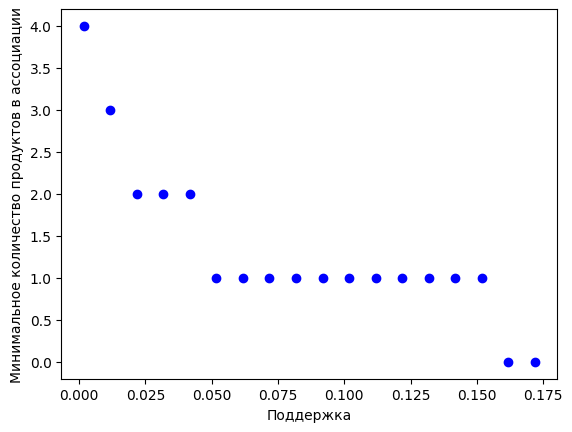

In [18]:
plt.scatter(row_params['support'], row_params['len_items'], color='blue')
plt.xlabel('Поддержка')
plt.ylabel('Минимальное количество продуктов в ассоциации')

#Алгоритм Apriori

In [161]:
#Алгоритм Apriori
df1 = apriori(data, min_support=0.01, use_colnames = True)
df1


,support,itemsets
0,0.018800,(almonds)
1,0.025600,(avocado)
2,0.010400,(barbecue sauce)
3,0.013067,(black tea)
4,0.011333,(body spray)
...,...,...
169,0.010000,"(chocolate, spaghetti, mineral water)"
170,0.011200,"(milk, eggs, mineral water)"
171,0.011867,"(spaghetti, eggs, mineral water)"
172,0.012533,"(ground beef, spaghetti, mineral water)"


In [162]:
rules = association_rules(df1, metric = "confidence", min_threshold = 0.35)
print(rules)

                     antecedents      consequents  antecedent support  \
0            (frozen vegetables)  (mineral water)            0.045600   
1                  (ground beef)  (mineral water)            0.069200   
2                  (ground beef)      (spaghetti)            0.069200   
3                         (milk)  (mineral water)            0.105467   
4                    (olive oil)  (mineral water)            0.056800   
5                       (salmon)  (mineral water)            0.038533   
6                       (shrimp)  (mineral water)            0.028133   
7                         (soup)  (mineral water)            0.040133   
8                    (spaghetti)  (mineral water)            0.126933   
9                     (tomatoes)  (mineral water)            0.040133   
10                    (tomatoes)      (spaghetti)            0.040133   
11             (chocolate, milk)  (mineral water)            0.025067   
12        (chocolate, spaghetti)  (mineral water)  

Text(0, 0.5, 'Максимальное количество продуктов в ассоциации')

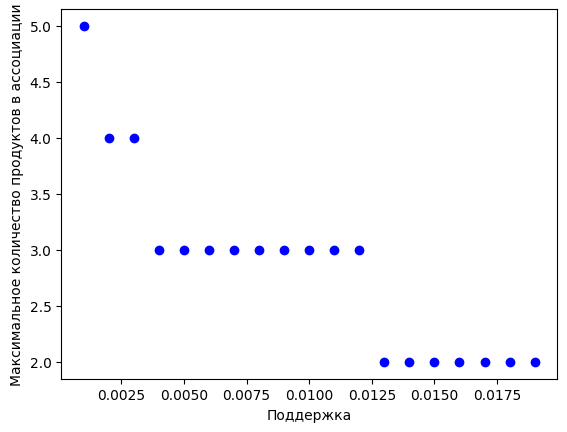

In [163]:
# Подбор минимальных параметров
row_params1 = {'support': [],
        'len_items': []}
for min_sup in np.arange(0.001, 0.02, 0.001):
  df1 = apriori(data, min_support=min_sup, use_colnames = True)
  ln = get_max_len_itemsets(df1['itemsets'])
  row_params1['support'].append(min_sup)
  row_params1['len_items'].append(ln)

plt.scatter(row_params1['support'], row_params1['len_items'], color='blue')
plt.xlabel('Поддержка')
plt.ylabel('Максимальное количество продуктов в ассоциации')

In [164]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

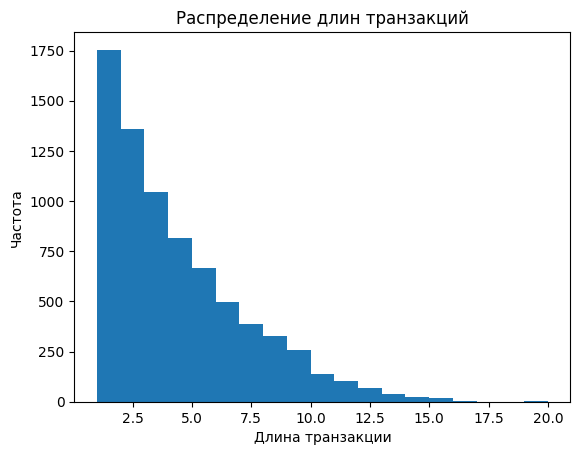

In [165]:
#Анализ транзакций
transaction_lengths = all_data.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.show()


     support        itemsets
26  0.161333   mineral water
11  0.142533            eggs
14  0.138400    french fries
33  0.126933       spaghetti
19  0.119067       green tea
7   0.111733       chocolate
25  0.105467            milk
29  0.084400        pancakes
24  0.070267  low fat yogurt
20  0.069200     ground beef


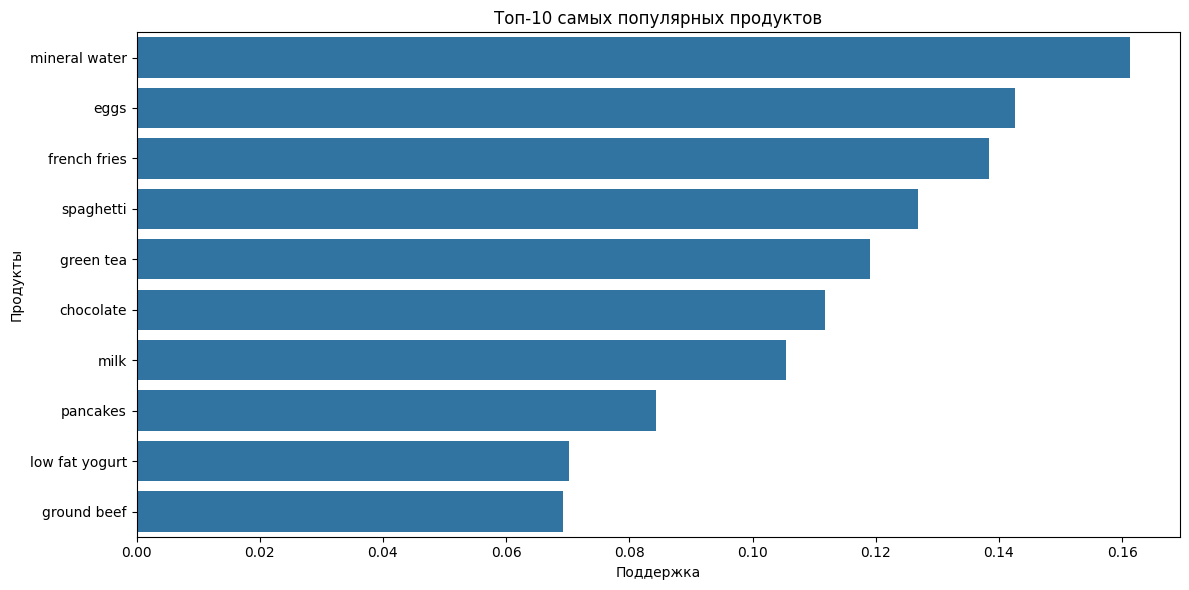

In [166]:
#Поддержка
df1['itemsets'] = df1['itemsets'].apply(lambda x: ', '.join(list(x)))
top_products = df1.sort_values(by='support', ascending=False).head(10)
print(top_products)
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=top_products)
plt.title('Топ-10 самых популярных продуктов')
plt.xlabel('Поддержка')
plt.ylabel('Продукты')
plt.tight_layout()
plt.show()
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))


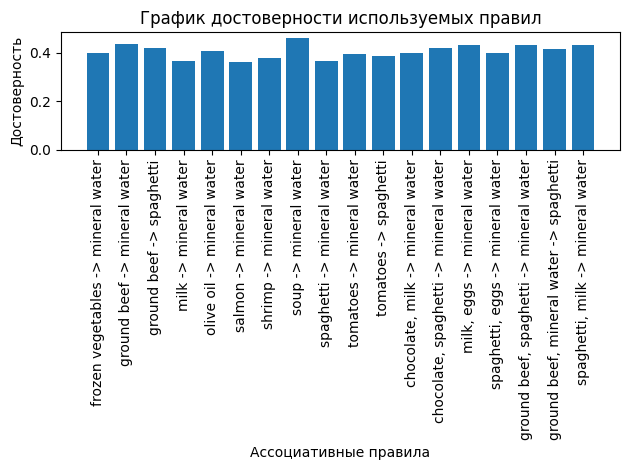

In [167]:
#График достоверности используемых правил
products_1 = rules["antecedents"].tolist()
products_2 = rules["consequents"].tolist()
confidence = rules["confidence"].tolist()
rules_labels = [f"{product1} -> {product2}" for product1, product2 in zip(products_1, products_2)]
plt.bar(rules_labels, confidence)
plt.xlabel("Ассоциативные правила")
plt.ylabel("Достоверность")
plt.title("График достоверности используемых правил")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-168-4c4960bef337>:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


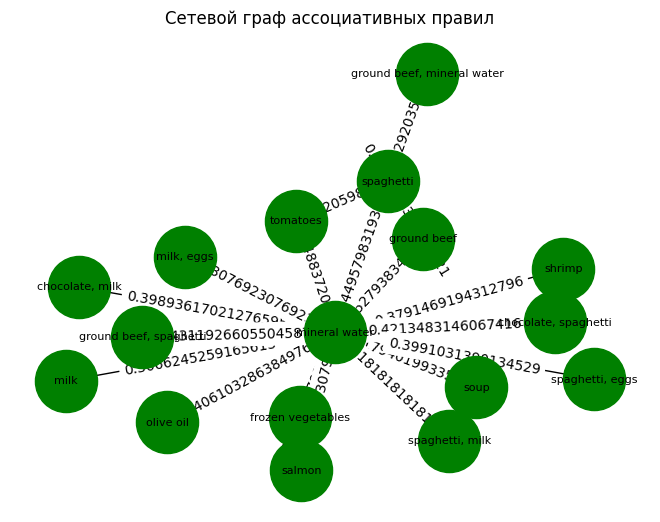

In [168]:
#Визуализация ассоциативных правил в виде графа
G = nx.Graph()
for product in rules["antecedents"]:
  G.add_node(product)
for product in rules["consequents"]:
  G.add_node(product)
for index, row in rules.iterrows():
  G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='green', font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Сетевой граф ассоциативных правил')
plt.tight_layout()
plt.show()

Ассоциативная карта

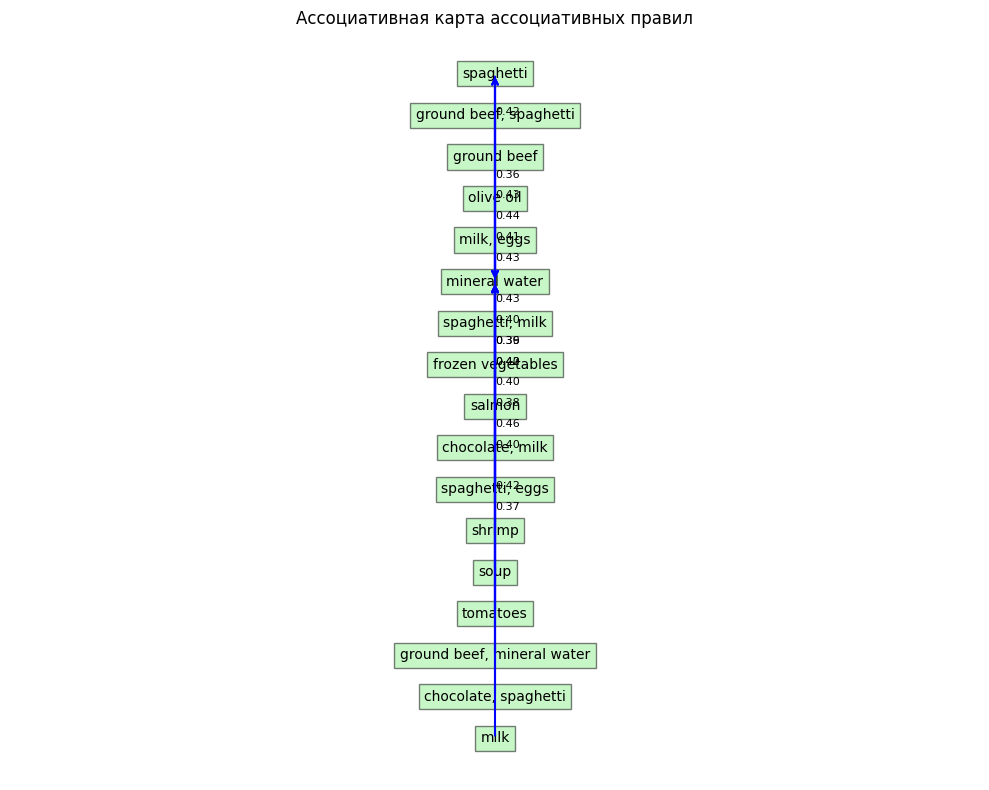

In [169]:
import matplotlib.pyplot as plt
import numpy as np

# Пример данных
# rules - это DataFrame с колонками 'antecedents', 'consequents' и 'confidence'
# rules = pd.DataFrame(...)

# Уникальные продукты
products = list(set(rules['antecedents']).union(set(rules['consequents'])))

# Создание словаря для хранения связи между продуктами
associations = {product: [] for product in products}

# Заполнение ассоциаций
for index, row in rules.iterrows():
    associations[row['antecedents']].append((row['consequents'], row['confidence']))

# Настройка графика
fig, ax = plt.subplots(figsize=(10, 8))

# Определение начальных координат для продуктов
y_positions = np.linspace(len(products) - 1, 0, len(products))
x_positions = np.zeros(len(products))

# Отображение продуктов
for i, product in enumerate(products):
    ax.text(x_positions[i], y_positions[i], product, ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightgreen', alpha=0.5))

# Отображение ассоциаций
for product, connections in associations.items():
    for connection, confidence in connections:
        # Получаем индексы для текущего продукта и его ассоциации
        product_index = products.index(product)
        connection_index = products.index(connection)

        ax.annotate('',
                    xy=(x_positions[connection_index], y_positions[connection_index]),
                    xytext=(x_positions[product_index], y_positions[product_index]),
                    arrowprops=dict(arrowstyle='->', color='blue', lw=1.5))

        # Добавление текста с уровнем доверия
        ax.text((x_positions[product_index] + x_positions[connection_index]) / 2,
                 (y_positions[product_index] + y_positions[connection_index]) / 2,
                 f'{confidence:.2f}', color='black', fontsize=8)

# Настройка осей
ax.set_xlim(-1, 1)
ax.set_ylim(-1, len(products))
ax.axis('off')
plt.title('Ассоциативная карта ассоциативных правил')
plt.tight_layout()
plt.show()

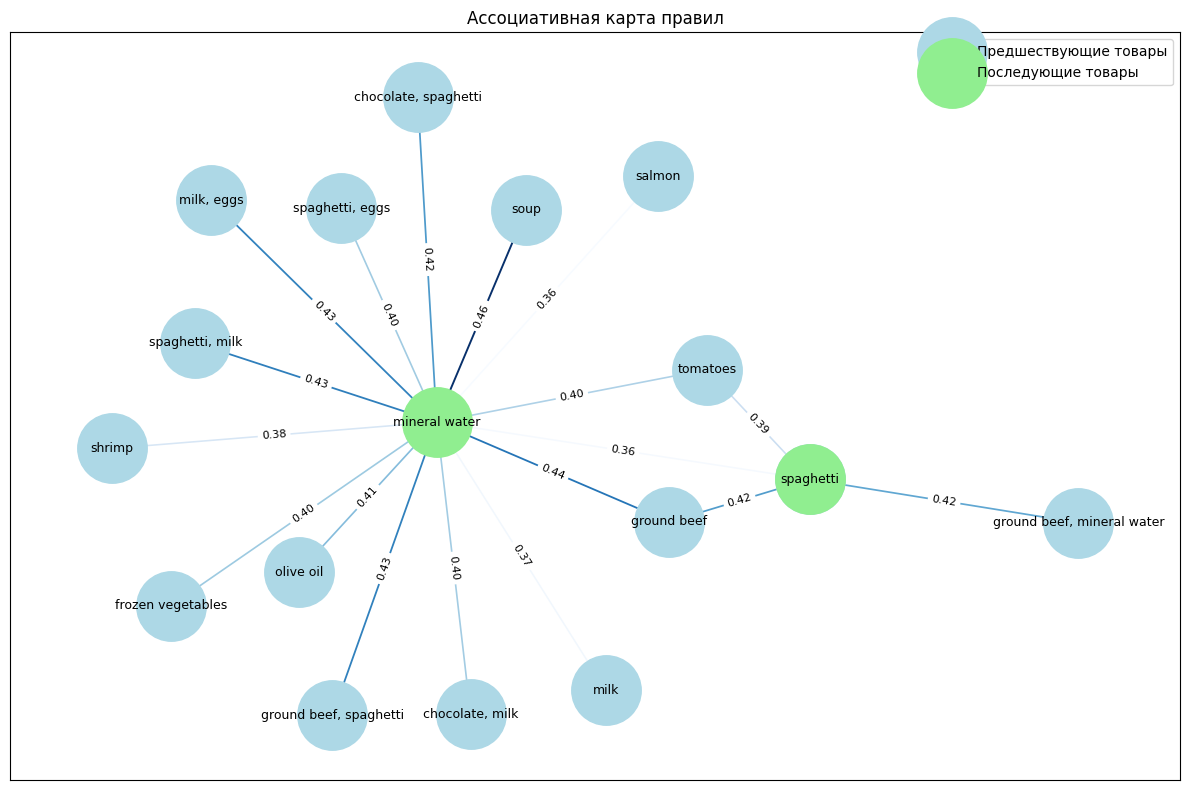

In [170]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем граф
G = nx.Graph()

# Добавляем узлы с разными стилями для antecedents и consequents
antecedent_nodes = set()
consequent_nodes = set()

for product in rules["antecedents"]:
    G.add_node(str(product))
    antecedent_nodes.add(str(product))
for product in rules["consequents"]:
    G.add_node(str(product))
    consequent_nodes.add(str(product))

# Добавляем ребра с весами
for index, row in rules.iterrows():
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['confidence'])

# Расположение узлов
pos = nx.spring_layout(G)

# Настраиваем стили для узлов и ребер
plt.figure(figsize=(12, 8))

# Отдельно отрисуем узлы antecedents и consequents
nx.draw_networkx_nodes(G, pos, nodelist=antecedent_nodes, node_color='lightblue', node_size=2500, label="Предшествующие товары")
nx.draw_networkx_nodes(G, pos, nodelist=consequent_nodes, node_color='lightgreen', node_size=2500, label="Последующие товары")

# Настраиваем цвет и ширину ребер на основе confidence
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw_networkx_edges(G, pos, edge_color=weights, edge_cmap=plt.cm.Blues, width=[3 * w for w in weights])

# Подписи узлов и ребер
nx.draw_networkx_labels(G, pos, font_size=9, font_color='black')
edge_labels = {(str(row['antecedents']), str(row['consequents'])): f"{row['confidence']:.2f}" for index, row in rules.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Заголовок и легенда
plt.title('Ассоциативная карта правил')
plt.legend(scatterpoints=1, loc="best")
plt.tight_layout()
plt.show()
